# Convolutional Neural Networks

In [1]:
import tensorflow.keras as keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Steps 1, 2, 3 (as before)

In [3]:
# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

### 3c. Reshape images for CNN (new step!)

In [4]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [5]:
# reshape

x_train = x_train.reshape(-1, 28, 28, 1) # -1 means 'keep this dimension as-is and don't reshape'
x_valid = x_valid.reshape(-1, 28, 28, 1) # 1 means 1 color channel, rgb would have 3 instead

In [6]:
x_train.shape, x_valid.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

## 4. Create the model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

2022-06-29 22:25:48.821356: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# compile model

model.compile(loss='categorical_crossentropy', 
             metrics=['accuracy'])

## 5. Train/fit the model

In [9]:
history = model.fit(x_train, y_train, 
                   epochs=20, 
                   verbose=1, 
                   validation_data=(x_valid, y_valid))

Epoch 1/20


2022-06-29 22:25:49.025805: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


858/858 [==============================] - 42s 48ms/step - loss: 0.8390 - accuracy: 0.7538 - val_loss: 0.2847 - val_accuracy: 0.9133
Epoch 2/20
858/858 [==============================] - 50s 58ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.7772 - val_accuracy: 0.8222
Epoch 3/20
858/858 [==============================] - 53s 61ms/step - loss: 0.0107 - accuracy: 0.9975 - val_loss: 0.3692 - val_accuracy: 0.9409
Epoch 4/20
858/858 [==============================] - 55s 64ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.3446 - val_accuracy: 0.9269
Epoch 5/20
858/858 [==============================] - 57s 66ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 0.4228 - val_accuracy: 0.9314
Epoch 6/20
858/858 [==============================] - 54s 63ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.5509 - val_accuracy: 0.9103
Epoch 7/20
858/858 [==============================] - 52s 61ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.3520 - val_accuracy: 0.9491
Epo

In [10]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


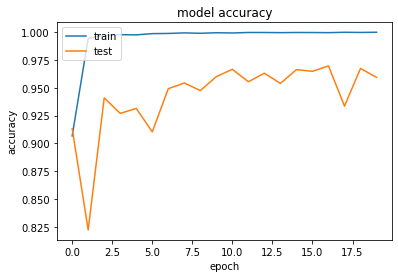

In [11]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

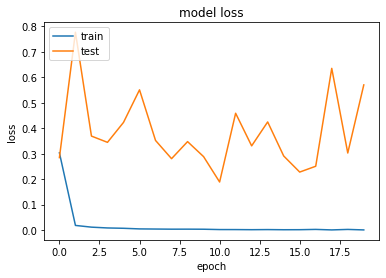

In [12]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Test the model on new data